# Mask R-CNN demo

This notebook illustrates one possible way of using `maskrcnn_benchmark` for computing predictions on images from an arbitrary URL.

Let's start with a few standard imports

In [1]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from PIL import Image
import numpy as np

In [2]:
# this makes our figures bigger
pylab.rcParams['figure.figsize'] = 20, 12

Those are the relevant imports for the detection model

In [3]:
from maskrcnn_benchmark.config import cfg

We provide a helper class `NERVEDemo`, which loads a model from the config file, and performs pre-processing, model prediction and post-processing for us.

We can configure several model options by overriding the config options.
In here, we make the model run on the CPU

In [4]:
config_file = "../configs/nerve.yaml"

# update the config options with the config file
cfg.merge_from_file(config_file)
# manual override some options
cfg.merge_from_list(["MODEL.DEVICE", "cpu"])
cfg.OUTPUT_DIR = '101_model_2_anchor'

Now we create the `NERVEDemo` object. It contains a few extra options for conveniency, such as the confidence threshold for detections to be shown.

In [93]:
from predictor import NERVEDemo
nerve_demo = NERVEDemo(
    cfg,
    min_image_size=500,
    confidence_threshold=0.7,
)

Let's define a few helper functions for loading images from a URL

In [86]:
def load(path):
    """
    Given an url of an image, downloads the image and
    returns a PIL image
    """
    pil_image = Image.open(path).convert("RGB")
    # convert to BGR format
    image = np.array(pil_image)[:, :, [2, 1, 0]]
    return image

def imshow(img):
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.axis("off")

Let's now load an image from the COCO dataset. It's reference is in the comment

In [94]:
pairs = [
    ['00005630', '30_87'],
    ['00005281', '20_30'],
    ['00004963', '20_92'],
    ['00000348', '20_5'],
    ['00005216', '40_45'],
    ['00005544', '40_31']
]

In [95]:
pair = pairs[4]

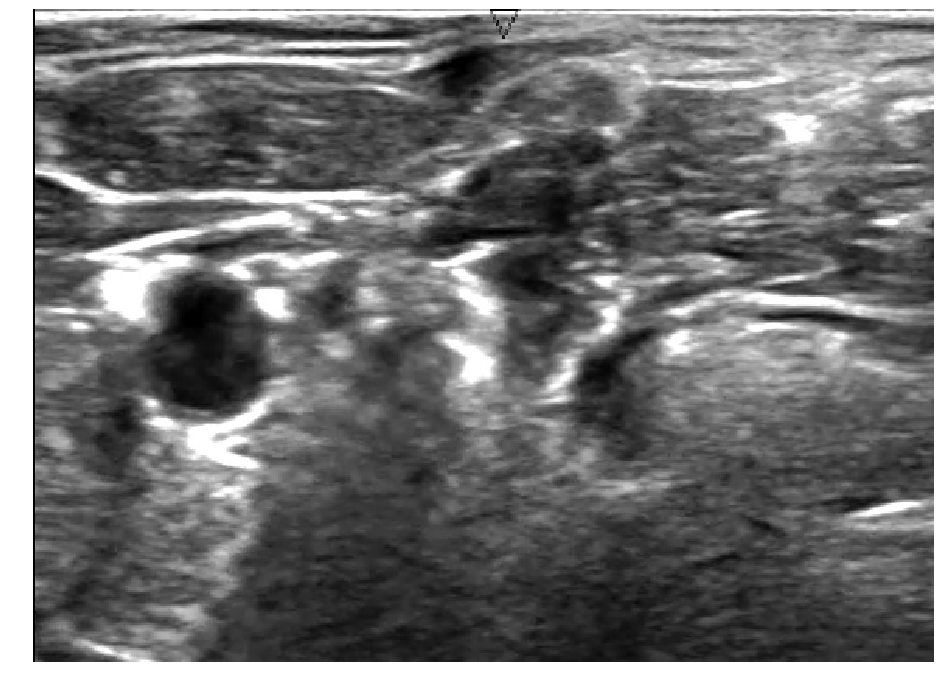

In [96]:
image = load(f"/scratch/jtb470/nerve_coco_data/val/{pair[0]}.jpg")
imshow(image)

In [97]:
mask = load(f"/scratch/jtb470/nerve_data/train/{pair[1]}_mask.tif")
inverted_mask = mask ^ 255
inverted_mask[inverted_mask > .5] = 1
# imshow(mask)

### Computing the predictions

We provide a `run_on_opencv_image` function, which takes an image as it was loaded by OpenCV (in `BGR` format), and computes the predictions on them, returning an image with the predictions overlayed on the image.

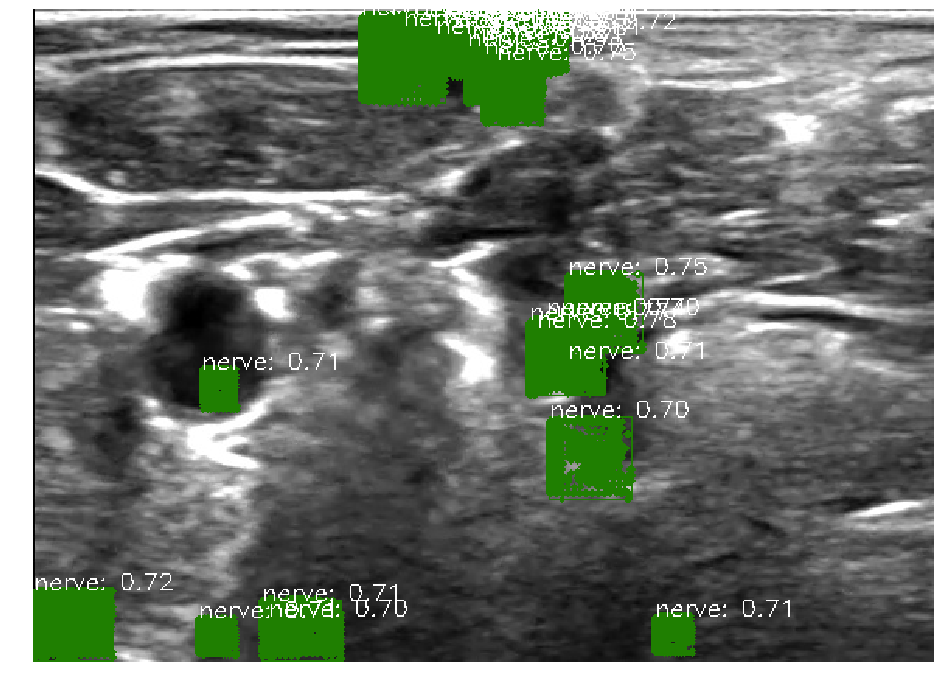

In [98]:
# compute predictions
results, predictions = nerve_demo.run_on_opencv_image(image)
imshow(results)

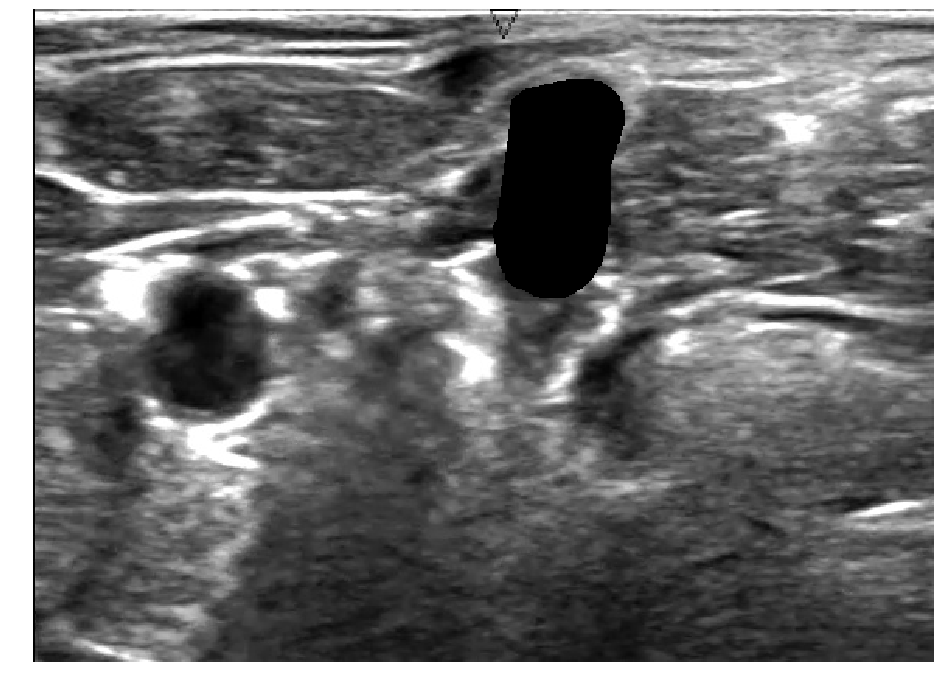

In [99]:
inverted_mask[inverted_mask > .5] = 1
with_mask = image * inverted_mask
imshow(with_mask)